In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
#needed to import qke procedures
import sys
from pathlib import Path

main_dir = str(Path().resolve().parent)
sys.path.insert(1, main_dir)

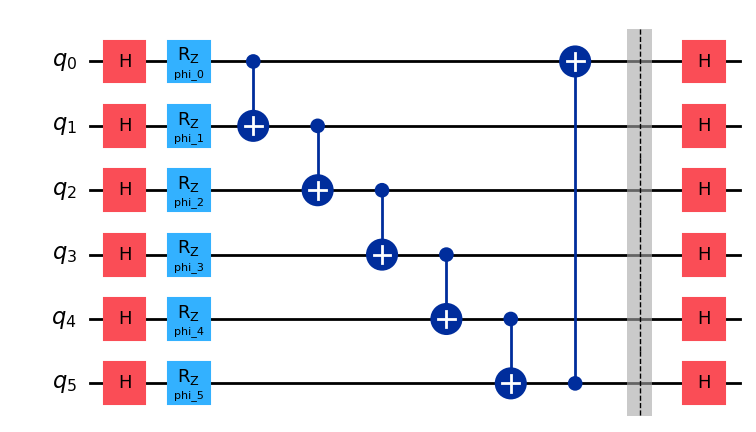

In [3]:
from qke.qproc import Circuits

q_template = Circuits.ansatz_encoded(6)
q_template.draw('mpl')

In [4]:
#load dataset with panda
#data are scaled outside the notebook
import pandas as pd

env = pd.read_csv('../data/env.sel3.scaled.csv')  
X = env[['illuminance', 'blinds','lamps','rh', 'co2', 'temp']]

In [5]:
X_value = X.values[0]
print(X_value)


[-0.99277374  1.          0.          0.40689999 -1.00177691 -0.06102718]


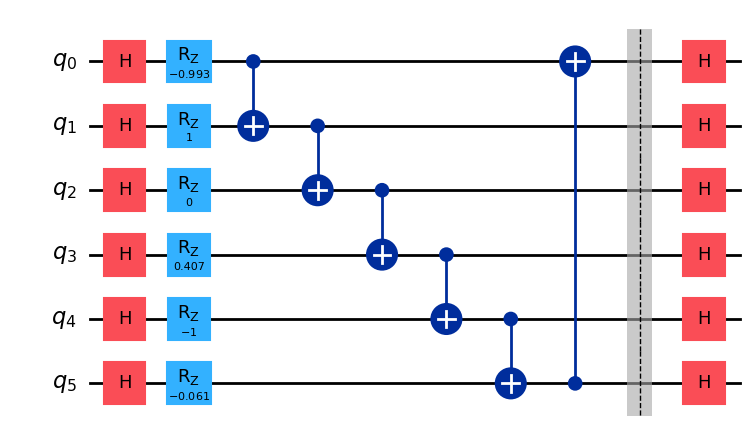

In [6]:
from qke.qproc import qEncoding

my_q_assigned = qEncoding(q_template, X_value)
my_q_assigned.draw('mpl')

In [7]:
from qke.qproc import Measures

#try evaluatin function
a = Measures.Aer(qc=my_q_assigned, observables=["ZIIIII","IZIIII", "IIZIII", "IIIZII","IIIIZI",'IIIIIZ'])
b = Measures.PrimitiveEstimator(qc=my_q_assigned, observables=["ZIIIII","IZIIII", "IIZIII", "IIIZII","IIIIZI",'IIIIIZ'])
c = Measures.StateVectorEstimator(qc=my_q_assigned, observables=["ZIIIII","IZIIII", "IIZIII", "IIIZII","IIIIZI",'IIIIIZ'])

In [8]:
print(type(a))
print(a)
print(b)
print(c)

<class 'numpy.ndarray'>
[0.2946548  0.5378032  0.49481384 0.91835211 0.54030231 0.29520434]
[0.17601258 0.76519842 0.48420043 0.90208061 0.61765244 0.21354964]
[0.2946548  0.5378032  0.49481384 0.91835211 0.54030231 0.29520434]


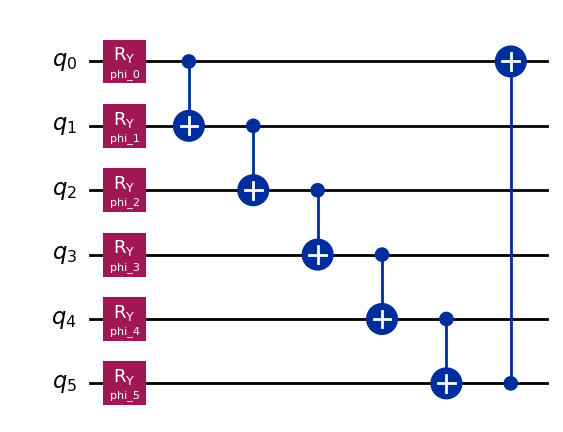

In [9]:
q_template_polar = Circuits.y_encoded(6)
q_template_polar.draw('mpl')

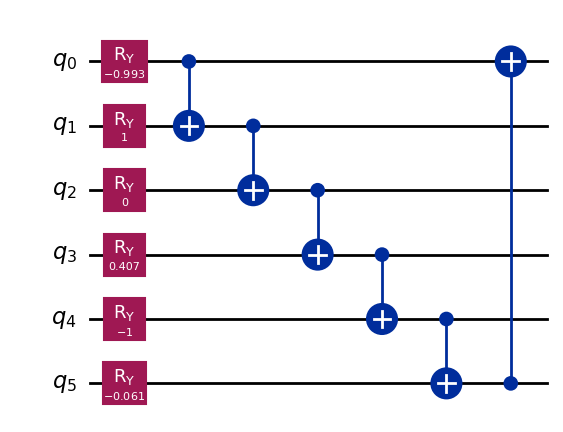

In [10]:
my_q_assigned_p = qEncoding(q_template_polar,X_value)
my_q_assigned_p.draw('mpl')

In [11]:
a_ = Measures.Aer(qc=my_q_assigned_p, observables=["ZIIIII","IZIIII", "IIZIII", "IIIZII","IIIIZI",'IIIIIZ'])
b_ = Measures.PrimitiveEstimator(qc=my_q_assigned_p, observables=["ZIIIII","IZIIII", "IIZIII", "IIIZII","IIIIZI",'IIIIIZ'])
c_ = Measures.StateVectorEstimator(qc=my_q_assigned_p, observables=["ZIIIII","IZIIII", "IIZIII", "IIIZII","IIIIZI",'IIIIIZ'])

In [12]:
print(a_)
#print(b_)
print(c_)

[0.14579927 0.14607119 0.27110153 0.29520434 0.29520434 0.26685137]
[0.14579927 0.14607119 0.27110153 0.29520434 0.29520434 0.26685137]


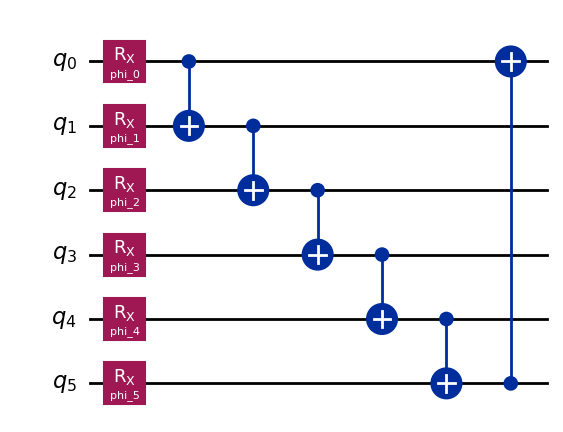

In [13]:
#try circuit X
x_enconding = Circuits.x_encoded(n_wire= 6)
x_enconding.draw('mpl')

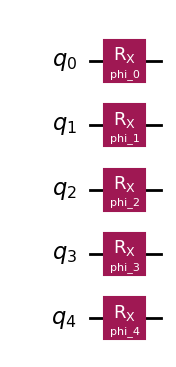

In [14]:
ss = Circuits.x_encoded(n_wire=5, full_ent=False)
ss.draw('mpl')

In [15]:
from qiskit.quantum_info import Operator
import numpy as np



op = Operator.from_label('ZXIZIY')
op_np = op.to_matrix()

#print(op_np)

res = np.linalg.eig(op_np)

print(res.eigenvalues.shape)
print(res.eigenvalues)





(64,)
[ 1.+0.j -1.+0.j  1.+0.j -1.+0.j  1.+0.j -1.+0.j  1.+0.j -1.+0.j  1.+0.j
 -1.+0.j  1.+0.j -1.+0.j  1.+0.j -1.+0.j  1.+0.j -1.+0.j  1.+0.j -1.+0.j
  1.+0.j -1.+0.j  1.+0.j -1.+0.j  1.+0.j -1.+0.j  1.+0.j -1.+0.j  1.+0.j
 -1.+0.j  1.+0.j -1.+0.j  1.+0.j -1.+0.j  1.+0.j -1.+0.j  1.+0.j -1.+0.j
  1.+0.j -1.+0.j  1.+0.j -1.+0.j  1.+0.j -1.+0.j  1.+0.j -1.+0.j  1.+0.j
 -1.+0.j  1.+0.j -1.+0.j  1.+0.j -1.+0.j  1.+0.j -1.+0.j  1.+0.j -1.+0.j
  1.+0.j -1.+0.j  1.+0.j -1.+0.j  1.+0.j -1.+0.j  1.+0.j -1.+0.j  1.+0.j
 -1.+0.j]


In [16]:
f = {'a': 4,'b': 7}

for i, (k,v) in enumerate(f.items()):
    print(k,v)

a 4
b 7


In [17]:
from qiskit.circuit.quantumcircuit import QuantumCircuit

zz =  Circuits.zzfeaturemap(6)
zz.decompose().draw()



┌───┐┌─────────────┐                                               »
q_0: ┤ H ├┤ P(2.0*x[0]) ├──■────────────────────────────────────■────■──»
     ├───┤├─────────────┤┌─┴─┐┌──────────────────────────────┐┌─┴─┐  │  »
q_1: ┤ H ├┤ P(2.0*x[1]) ├┤ X ├┤ P(2.0*(π - x[0])*(π - x[1])) ├┤ X ├──┼──»
     ├───┤├─────────────┤└───┘└──────────────────────────────┘└───┘┌─┴─┐»
q_2: ┤ H ├┤ P(2.0*x[2]) ├──────────────────────────────────────────┤ X ├»
     ├───┤├─────────────┤                                          └───┘»
q_3: ┤ H ├┤ P(2.0*x[3]) ├───────────────────────────────────────────────»
     ├───┤├─────────────┤                                               »
q_4: ┤ H ├┤ P(2.0*x[4]) ├───────────────────────────────────────────────»
     ├───┤├─────────────┤                                               »
q_5: ┤ H ├┤ P(2.0*x[5]) ├───────────────────────────────────────────────»
     └───┘└─────────────┘                                               »
«                                                    »
«q_0: ──────────────────────────────────■─────────■──»
«                                       │         │  »
«q_1: ──────────────────────────────────┼────■────┼──»
«     ┌──────────────────────────────┐┌─┴─┐┌─┴─┐  │  »
«q_2: ┤ P(2.0*(π - x[0])*(π - x[2])) ├┤ X ├┤ X ├──┼──»
«     └──────────────────────────────┘└───┘└───┘┌─┴─┐»
«q_3: ──────────────────────────────────────────┤ X ├»
«                                               └───┘»
«q_4: ───────────────────────────────────────────────»
«                                                    »
«q_5: ───────────────────────────────────────────────»
«                                                    »
«                                                         »
«q_0: ───────────────────────────────────────■─────────■──»
«                                            │         │  »
«q_1: ──────────────────────────────────■────┼────■────┼──»
«     ┌──────────────────────────────┐┌─┴─┐  │    │    │  »
«q_2: ┤ P(2.0*(π - x[1])*(π - x[2])) ├┤ X ├──┼────┼────┼──»
«     ├──────────────────────────────┤└───┘┌─┴─┐┌─┴─┐  │  »
«q_3: ┤ P(2.0*(π - x[0])*(π - x[3])) ├─────┤ X ├┤ X ├──┼──»
«     └──────────────────────────────┘     └───┘└───┘┌─┴─┐»
«q_4: ───────────────────────────────────────────────┤ X ├»
«                                                    └───┘»
«q_5: ────────────────────────────────────────────────────»
«                                                         »
«                                                              »
«q_0: ───────────────────────────────────────■──────────────■──»
«                                            │              │  »
«q_1: ──────────────────────────────────■────┼─────────■────┼──»
«                                       │    │         │    │  »
«q_2: ──────────────────────────────────┼────┼────■────┼────┼──»
«     ┌──────────────────────────────┐┌─┴─┐  │  ┌─┴─┐  │    │  »
«q_3: ┤ P(2.0*(π - x[1])*(π - x[3])) ├┤ X ├──┼──┤ X ├──┼────┼──»
«     ├──────────────────────────────┤└───┘┌─┴─┐└───┘┌─┴─┐  │  »
«q_4: ┤ P(2.0*(π - x[0])*(π - x[4])) ├─────┤ X ├─────┤ X ├──┼──»
«     └──────────────────────────────┘     └───┘     └───┘┌─┴─┐»
«q_5: ────────────────────────────────────────────────────┤ X ├»
«                                                         └───┘»
«                                                    ┌───┐┌─────────────┐»
«q_0: ────────────────────────────────────────────■──┤ H ├┤ P(2.0*x[0]) ├»
«                                                 │  └───┘└─────────────┘»
«q_1: ───────────────────────────────────────■────┼──────────────■───────»
«                                            │    │              │       »
«q_2: ──────────────────────────────────■────┼────┼────■─────────┼───────»
«     ┌──────────────────────────────┐┌─┴─┐  │    │    │         │       »
«q_3: ┤ P(2.0*(π - x[2])*(π - x[3])) ├┤ X ├──┼────┼────┼─────────┼───────»
«     ├──────────────────────────────┤└───┘┌─┴─┐  │  ┌─┴─┐       │       »
«q_4: ┤ P(2.0*(π - x[1])*(π 

In [27]:
print(X_value)

zz_encoded = qEncoding(data=X_value, qc=zz)

zz_encoded.draw()

[-0.99277374  1.          0.          0.40689999 -1.00177691 -0.06102718]


┌──────────────────────────────────────────────────────┐
q_0: ┤0                                                     ├
     │                                                      │
q_1: ┤1                                                     ├
     │                                                      │
q_2: ┤2                                                     ├
     │  ZZFeatureMap(-0.99277,1,0,0.4069,-1.0018,-0.061027) │
q_3: ┤3                                                     ├
     │                                                      │
q_4: ┤4                                                     ├
     │                                                      │
q_5: ┤5                                                     ├
     └──────────────────────────────────────────────────────┘

In [22]:
z_ =  Measures.StateVectorEstimator(qc=zz_encoded , observables=["ZIIIII"])


print(z_)

NameError: name 'zz_encoded' is not defined

In [ ]:
from qke.qproc import CircuitContainer
from qke.qproc import Measures
c_zz = CircuitContainer(qtemplate=Circuits.zzfeaturemap, nwire=6, obs=['ZIIIII'], measure_fn=Measures.StateVectorEstimator)
c_zz.metadata()

*** Quantum template for feature map using 6 qubit ***
     ┌──────────────────────────────────────────────┐
q_0: ┤0                                             ├
     │                                              │
q_1: ┤1                                             ├
     │                                              │
q_2: ┤2                                             ├
     │  ZZFeatureMap(x[0],x[1],x[2],x[3],x[4],x[5]) │
q_3: ┤3                                             ├
     │                                              │
q_4: ┤4                                             ├
     │                                              │
q_5: ┤5                                             ├
     └──────────────────────────────────────────────┘
*** Required observables: ['ZIIIII']
*** Measure procedure: StateVectorEstimator


''

In [ ]:
c_zz.obs

['ZIIIII']

In [19]:
Operator.from_label('X')

Operator([[0.+0.j, 1.+0.j],
          [1.+0.j, 0.+0.j]],
         input_dims=(2,), output_dims=(2,))


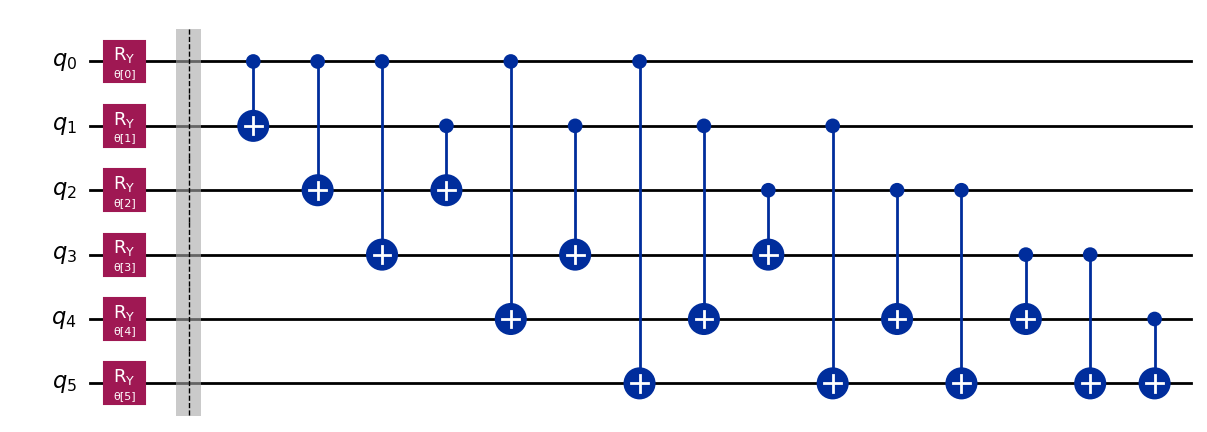

Numbers of layers: 6


In [10]:
from qiskit.circuit.library import TwoLocal

n_qubits = 6
n_layers = 1
#circuit = TwoLocal(n_qubits, 'ry', 'cx', 'linear', reps=n_layers)
twl = TwoLocal(n_qubits, 
                   rotation_blocks='ry', 
                   entanglement_blocks='cx', 
                   entanglement='full', 
                   reps=n_layers, 
                   insert_barriers=True, skip_final_rotation_layer=True)

display(twl.decompose().draw('mpl'))


num_pars = len(twl.parameters)
print(f'Numbers of layers: {num_pars}')




In [19]:
twl.parameters

KeyError: "no parameter named '0' is present"